In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
import decimal

In [4]:
data_i = pd.read_csv('R3_combine_intensity_2.csv')
data_b = pd.read_csv('R3_combine_baseband.csv')
print(data_i)
#print(data_b)

    Unnamed: 0   Event_id  Downsample  Scattering(s)  Sc_err(s)  \
0            0   15372046         384       0.001051   0.000173   
1            1   18685272         384       0.004913   0.000000   
2            2   20425523         384       0.002598   0.000000   
3            3   20425669         384       0.013213   0.000000   
4            4   20887861         384       0.002241   0.000000   
5            5   20887865         384       0.002312   0.000000   
6            6   23491552         384       0.000763   0.000000   
7            7   23588210         384       0.003990   0.000000   
8            8   28293423         384       0.004166   0.000000   
9            9   28293424         384       0.000000   0.000000   
10          10   39150325         384       0.004136   0.000000   
11          11   39150809         384       0.003920   0.000000   
12          12   39275710         384       0.000360   0.000047   
13          13   39278375         384       0.003024   0.00000

In [7]:
data_unpublished = data_i[data_i['Event_id'] > 135577833]
data_unpublished = data_unpublished.sort_values(['Event_id'])
print(data_unpublished)

### Intensity Table ####

sc = data_unpublished["Scattering(s)"].to_numpy()
sc_err = data_unpublished["Sc_err(s)"].to_numpy()
dm = data_unpublished["DM_fitburst"].to_numpy()
dm_err = data_unpublished["DM_err_fitburst"].to_numpy()

sc_tab = []
dm_tab = []
w_tab = []

for i in range(len(sc)):
    s = str((sc[i]*1000).round(3))+'('+str((sc_err[i]*1000).round(3))+')'
    sc_tab.append(s)
    d_t = str(dm[i].round(3))+'('+str(dm_err[i].round(3))+')'
    dm_tab.append(d_t)
print(sc_tab)
print(dm_tab)

data_table = data_unpublished[['Event_id','TOA','phase','DM_fitburst','Downsample','Scattering(s)','Bandwidth','Center_Freq']]
data_table["DM_final"] = dm_tab
data_table["phase"] = data_table["phase"].round(3)
data_table["Scattering(ms)"] = sc_tab
data_table["Bandwidth"] = data_table["Bandwidth"].astype(int)
data_table["Center_Freq"] = data_table["Center_Freq"].astype(int)
data_table["MJD"] = data_table["TOA"].round(6)
#data_table["Width(ms)"] = (data_table["Widths(s)"]*1000).round(3)
data_table = data_table.drop(['Scattering(s)','DM_fitburst'], axis=1)
print(data_table)

    Unnamed: 0   Event_id  Downsample  Scattering(s)  Sc_err(s)  \
39          39  139459007         384       0.000000   0.000000   
40          40  144520399         384       0.000943   0.000109   
41          41  154779432         384       0.009284   0.000000   
47          47  155079679         384       0.000925   0.000005   
48          48  157779605         384       0.002662   0.000007   
49          49  162981697         384       0.002303   0.000617   
42          42  163181404         384       0.000000   0.000000   
50          50  165238765         384       0.002080   0.000477   
51          51  175930797         384       0.000562   0.000003   
43          43  176156139         384       0.000000   0.000000   
44          44  188760049         384       0.004653   0.000000   
45          45  188760957         384       0.004349   0.000000   
46          46  198142107         384       0.007370   0.000000   

                  Widths(s)             Width_err(s)  Center_

<ipython-input-7-5b900b0c8ed1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table["DM_final"] = dm_tab
<ipython-input-7-5b900b0c8ed1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_table["phase"] = data_table["phase"].round(3)
<ipython-input-7-5b900b0c8ed1>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [8]:
data_table.to_csv('I_data_R3.csv')

In [25]:
data_i_no_data = data_i[data_i['TOA'] == 0]
data_i_data = data_i[data_i['TOA'] > 0]

print(data_i_no_data)

    Unnamed: 0   Event_id  Downsample  Scattering(s)  Sc_err(s)     Widths(s)  \
9            9   28293424         384       0.000000   0.000000           [0]   
19          19   47583802         384       0.000000   0.000000           [0]   
20          20   51101068         384       0.000000   0.000000           [0]   
21          21   51101217         384       0.000000   0.000000           [0]   
23          23   60073222         384       0.000000   0.000000           [0]   
24          24   65511496         384       0.000000   0.000000           [0]   
25          25   65511653         384       0.000000   0.000000           [0]   
39          39  139459007         384       0.000000   0.000000           [0]   
42          42  163181404         384       0.000000   0.000000           [0]   
43          43  176156139         384       0.000000   0.000000           [0]   
47          47  155079679         384       0.000925   0.000005  [0.00217425]   
48          48  157779605   

In [26]:
data_i_data_r3 = data_i_data[data_i_data["Sc_err(s)"] > 0]
data_i_data_r2 = data_i_data[data_i_data["Sc_err(s)"] == 0]

print(data_i_data_r3)
print(data_i_data_r2)

oname = "R3_intensity_round2.csv"
oname1 = "R3_intensity_round3.csv"

data_i_data_r3.to_csv(oname1)
data_i_data_r2.to_csv(oname)

    Unnamed: 0   Event_id  Downsample  Scattering(s)  Sc_err(s)  \
0            0   15372046         384       0.001051   0.000173   
12          12   39275710         384       0.000360   0.000047   
16          16   40363754         384       0.001996   0.000444   
17          17   40750656         384       0.001717   0.000106   
30          30   81931588         384       0.000110   0.000022   
31          31   82019295         384       0.001547   0.000242   
33          33  100904168         384       0.000212   0.000045   
40          40  144520399         384       0.000943   0.000109   

                             Widths(s)  \
0                         [0.00076526]   
12             [0.00026881 0.00127508]   
16  [0.00085383 0.00086955 0.00111706]   
17  [0.002      0.00124762 0.00074404]   
30                        [0.00034165]   
31                        [0.00055367]   
33                        [0.00330803]   
40             [0.00083347 0.00223258]   

                 

In [16]:
data_i_no_sc_no_run = data_i_no_sc[data_i_no_sc['TOA'] == 0]
data_i_no_sc_run = data_i_no_sc[data_i_no_sc['TOA'] > 0]

oname = "R3_intensity_round2.csv"
oname1 = "R3_intensity_nodata.csv"

data_i_no_sc_run.to_csv(oname)
data_i_no_sc_no_run.to_csv(oname1)

print(data_i_no_sc_run)

    Unnamed: 0   Event_id  Downsample  Scattering(s)  Sc_err(s)  \
1            1   18685272         384       0.004913        0.0   
2            2   20425523         384       0.002598        0.0   
3            3   20425669         384       0.013213        0.0   
4            4   20887861         384       0.002241        0.0   
5            5   20887865         384       0.002312        0.0   
6            6   23491552         384       0.000763        0.0   
7            7   23588210         384       0.003990        0.0   
8            8   28293423         384       0.004166        0.0   
10          10   39150325         384       0.004136        0.0   
11          11   39150809         384       0.003920        0.0   
13          13   39278375         384       0.003024        0.0   
14          14   39278417         384       0.005763        0.0   
15          15   40163166         384       0.003412        0.0   
18          18   47313912         384       0.006671        0.

In [9]:
combine = [data_i,data_b]
data_comb = pd.concat(combine, ignore_index=True)
print(data_comb)
data_comb = data_comb.sort_values(['Event_id'])
data_comb.drop(data_comb['Unnamed: 0'])
print(data_comb.columns)

    Unnamed: 0   Event_id  Downsample  Scattering(s)     Sc_err(s)  \
0            0   15372046         384       0.001051  1.730228e-04   
1            1   18685272         384       0.004913  0.000000e+00   
2            2   20425523         384       0.002598  0.000000e+00   
3            3   20425669         384       0.013213  0.000000e+00   
4            4   20887861         384       0.002241  0.000000e+00   
..         ...        ...         ...            ...           ...   
89          37  194488454          16       0.000867  1.418658e-04   
90          38  195132396          64       0.000180  2.567261e-07   
91          39  200973875         256       0.000795  4.219618e-04   
92          40  203798724         512       0.001213  6.715288e-05   
93          41  203935225          16       0.000432  3.213518e-05   

                  Widths(s)             Width_err(s) Center_Freq   Bandwidth  \
0              [0.00076526]         [7.48282901e-05]         0.0         0.0   

In [6]:
data_comb_new = data_comb[['Event_id','Downsample','Scattering(s)','Sc_err(s)',
                          'Widths(s)','Width_err(s)','Center_Freq','Bandwidth','TOA','phase',
                          'DM_fitburst','DM_err_fitburst','Type_of_data']].reset_index(drop=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data_comb_new['Event_id'], data_comb_new['TOA'])

0      15372046
1      18685272
2      20425523
3      20425669
4      20887861
5      20887865
6      23491552
7      23588210
8      23789294
9      23891929
10     28293423
11     28293424
12     39150325
13     39150809
14     39275710
15     39278375
16     39278417
17     40163166
18     40363753
19     40363754
20     40750224
21     40750656
22     47313912
23     47583802
24     51101068
25     51101217
26     51101285
27     60073222
28     60073678
29     65395717
30     65511496
31     65511653
32     67522832
33     67522901
34     69509443
35     71665813
36     71784400
37     71784510
38     71784833
39     71785167
40     73725034
41     73726599
42     73909400
43     78294947
44     81931588
45     82019295
46     83984528
47     84081108
48     92773515
49     92844954
50     95827868
51    100904168
52    100905566
53    105757295
54    130061681
55    131640713
56    135577833
57    139459007
58    144520399
59    151677988
60    153859596
61    154779432
62    15

In [7]:
events = data_comb_new['Event_id'].to_numpy()
dm_err = data_comb_new['DM_err_fitburst'].to_numpy()
toa = data_comb_new['TOA'].to_numpy()
dm = data_comb_new['DM_fitburst'].to_numpy()
for i in range(len(events)):
    if dm_err[i] == 0:
        print(events[i], toa[i], dm[i])

28293424 0.0 0.0
47583802 0.0 0.0
51101068 0.0 0.0
51101217 0.0 0.0
60073222 0.0 0.0
65511496 0.0 0.0
65511653 0.0 0.0
73725034 58898.99556771216 348.82
73909400 58900.00681365605 348.82
78294947 58932.89992750724 348.82
81931588 58962.81879965019 348.82
82019295 58963.8287794278 348.82
95827868 59032.6428525984 348.82
100904168 59047.58180961387 348.82
100905566 59047.58763695807 348.82
105757295 59062.56077987037 348.82
130061681 59095.46565397108 348.82
131640713 59096.45281263172 348.82
135577833 59111.40643075935 348.82
139459007 0.0 0.0
144520399 59176.24447382421 348.772
154779432 59243.05920500673 348.772
163181404 0.0 0.0
176156139 0.0 0.0
198142107 0.0 0.0


<ipython-input-8-d1b3fc699dcd>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


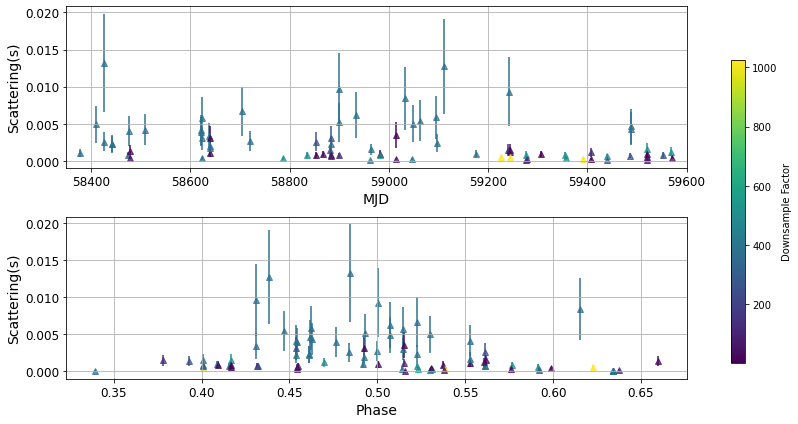

In [8]:
d = data_comb['Downsample'].to_numpy().astype(int)
sc = data_comb['Scattering(s)'].to_numpy().astype(float)
sc_err = data_comb['Sc_err(s)'].to_numpy().astype(float)
TOA = data_comb['TOA'].to_numpy().astype(float)
phase = data_comb['phase'].to_numpy().astype(float)
c_dsamps = np.zeros(len(d)).astype('str')


norm = mpl.colors.Normalize(vmin=np.min(d), vmax=np.max(d), clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
width_color = np.array([(mapper.to_rgba(v)) for v in d])
#print(width_color)

fig, ax = plt.subplots(2, 1, figsize = (10,6))

for x, y, e, color in zip(TOA, sc, sc*0.5, width_color):
    ax[0].errorbar(x, y, yerr=e, lw=2, color=color, zorder=1, alpha=0.75, marker = '^')

ax[0].set_ylabel("Scattering(s)", fontsize = 14)
ax[0].set_xlim(58350,59600)
ax[0].set_xlabel("MJD", fontsize = 14)
ax[0].grid()


for x, y, e, color in zip(phase, sc, sc*0.5, width_color):
    ax[1].errorbar(x, y, yerr=e, lw=2, color=color, zorder=1, alpha=0.75, marker = '^')


ax[1].set_ylabel("Scattering(s)", fontsize = 14)
ax[1].set_xlabel("Phase", fontsize = 14)
ax[1].grid()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(mapper, cax=cbar_ax, label='Downsample Factor')

for i in range(2):
    ax[i].tick_params(axis='both', which='both', labelsize=12)
fig.tight_layout()
plt.show()

In [19]:
oname = 'Combined_data.csv'
data_comb_new.to_csv(oname)